In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_excel("D:/Universidad/Maestria/Tesis/DATOS/Data_Agrupada_depurada/puntajes_agrupada.xlsx")

In [3]:
datos.head()

,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,PERIODO,PUNT_GLOBALmean,PUNT_GLOBALmedian,PUNT_GLOBALstd,PUNT_GLOBALmin,PUNT_GLOBALmax,CANTIDAD_ESTUDIANTES,ANO,SEMESTRE
0,105001000001,INST EDUC FE Y ALEGRIA JOSE MARIA VELAZ,5001,MEDELLÍN,5,ANTIOQUIA,20202,270.729730,273.0,37.553405,195,359,37,2020,2
1,105001000043,INST EDUC BARRIO SANTA CRUZ,5001,MEDELLÍN,5,ANTIOQUIA,20202,209.123711,208.0,45.576003,30,302,97,2020,2
2,105001000108,INST EDUC CEFA,5001,MEDELLÍN,5,ANTIOQUIA,20202,273.302400,275.0,40.798360,147,392,625,2020,2
3,105001000132,INST EDUC JOSE MARIA BERNAL,5001,MEDELLÍN,5,ANTIOQUIA,20202,271.735294,264.5,44.255573,167,385,68,2020,2
4,105001000141,INST EDUC CAMILO TORRES RESTREPO,5001,MEDELLÍN,5,ANTIOQUIA,20202,255.466667,247.0,30.982457,204,337,30,2020,2


In [4]:
data_calendario1=datos[datos['SEMESTRE']==1]
data_calendario2=datos[datos['SEMESTRE']==2]

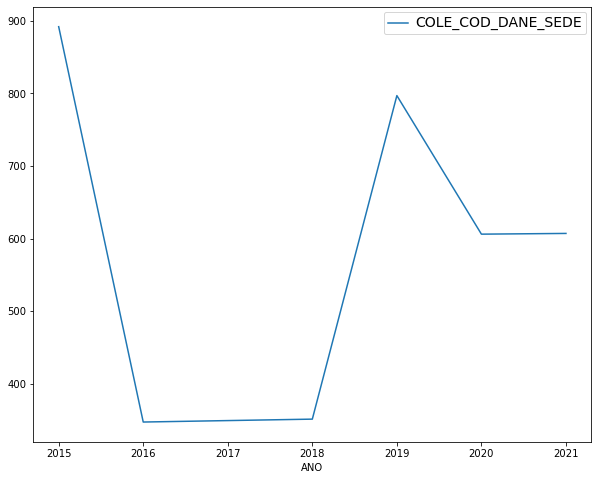

In [5]:
serie_calendario1= data_calendario1.groupby(['ANO'], as_index = False)[['COLE_COD_DANE_SEDE']].count()
serie_calendario1 = serie_calendario1.set_index("ANO")
serie_calendario1[['COLE_COD_DANE_SEDE']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

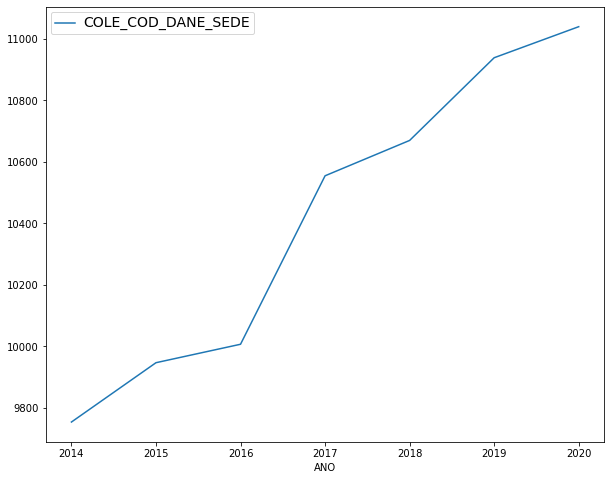

In [6]:
serie_calendario2= data_calendario2.groupby(['ANO'], as_index = False)[['COLE_COD_DANE_SEDE']].count()
serie_calendario2 = serie_calendario2.set_index("ANO")
serie_calendario2[['COLE_COD_DANE_SEDE']].plot(figsize=(10, 8), fontsize=10);
legend = plt.legend()
legend.prop.set_size(14);

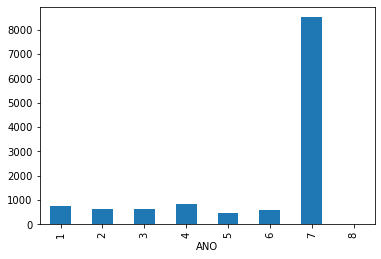

In [7]:
datos_garupados_ano2=data_calendario2.groupby(['COLE_COD_DANE_SEDE'], as_index = False)[['ANO']].count()
datos_garupados_ano2.groupby('ANO').count()['COLE_COD_DANE_SEDE'].plot(kind='bar')

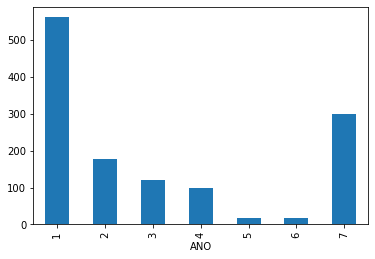

In [8]:
datos_garupados_ano1=data_calendario1.groupby(['COLE_COD_DANE_SEDE'], as_index = False)[['ANO']].count()
datos_garupados_ano1.groupby('ANO').count()['COLE_COD_DANE_SEDE'].plot(kind='bar')

In [10]:
#data_comentario_facebook.groupby('tipo').sum()["cantidad"].plot(kind='bar')

In [11]:
datos_campo2= data_calendario1.groupby(['ANO','COLE_COD_DANE_SEDE'], as_index = False)[['PUNT_GLOBALmean']].count()
datos_campo2.pivot(index='COLE_COD_DANE_SEDE', columns='ANO', values=['PUNT_GLOBALmean'])

PUNT_GLOBALmean                              
ANO                           2015 2016 2017 2018 2019 2020 2021
COLE_COD_DANE_SEDE                                              
105001000205                   NaN  NaN  NaN  NaN  NaN  NaN  1.0
105001000256                   1.0  NaN  NaN  NaN  NaN  NaN  NaN
105001000566                   1.0  NaN  NaN  NaN  NaN  NaN  NaN
105001000621                   NaN  NaN  NaN  NaN  NaN  NaN  1.0
105001000931                   NaN  NaN  NaN  NaN  NaN  NaN  1.0
...                            ...  ...  ...  ...  ...  ...  ...
625269000078                   1.0  NaN  NaN  NaN  NaN  NaN  NaN
625269000082                   1.0  NaN  NaN  NaN  NaN  NaN  NaN
625269000084                   1.0  NaN  NaN  NaN  NaN  NaN  NaN
818001100011                   NaN  NaN  NaN  NaN  NaN  NaN  1.0
818001100040                   1.0  NaN  NaN  NaN  NaN  NaN  1.0

[1290 rows x 7 columns]

In [12]:
datos_campo2= data_calendario2.groupby(['ANO','COLE_COD_DANE_SEDE'], as_index = False)[['CANTIDAD_ESTUDIANTES']].sum()

In [18]:
datos_join=pd.merge(datos_campo2, data_no_completos, on="COLE_COD_DANE_SEDE")

In [21]:
data_si_completos=datos_garupados_ano2[datos_garupados_ano2['ANO']==7]
datos_join2=pd.merge(datos_campo2, data_si_completos, on="COLE_COD_DANE_SEDE")
datos_join2.pivot(index='COLE_COD_DANE_SEDE', columns='ANO_x', values=['CANTIDAD_ESTUDIANTES'])

CANTIDAD_ESTUDIANTES                              
ANO_x                              2014 2015 2016 2017 2018 2019 2020
COLE_COD_DANE_SEDE                                                   
105001000001                         24   24   32   36   38   39   37
105001000043                         75   99  102   77   99   88   97
105001000108                       1001  987  968  959  865  869  625
105001000132                         76   79   68   64   65   67   68
105001000141                         23   25   18   34   33   49   30
...                                 ...  ...  ...  ...  ...  ...  ...
625269000075                         62   40   41   47   21   21   24
625269000078                         62   69  143  106  131  127   62
813430000003                         48   90   61   74   76   78   80
818001100027                         56   80   84   71   62   47   29
847001000027                         59   74   82   78   94   64  104

[8516 rows x 7 columns]

In [22]:
data_no_completos=datos_garupados_ano2[datos_garupados_ano2['ANO']!=7]

In [23]:
datos_join.pivot(index='COLE_COD_DANE_SEDE', columns='ANO_x', values=['CANTIDAD_ESTUDIANTES'])

CANTIDAD_ESTUDIANTES                                     
ANO_x                              2014  2015  2016  2017   2018  2019  2020
COLE_COD_DANE_SEDE                                                          
105001000167                       39.0  31.0   NaN  18.0    NaN   NaN   NaN
105001000191                        NaN   NaN   NaN  36.0   47.0  35.0  45.0
105001000493                        NaN   NaN   NaN  75.0   87.0  69.0  87.0
105001001686                        NaN   NaN  19.0  17.0   21.0  40.0  38.0
105001001716                        NaN  26.0  24.0  31.0   38.0  30.0  32.0
...                                 ...   ...   ...   ...    ...   ...   ...
847001000009                        NaN   NaN   NaN   NaN    NaN  50.0   NaN
847001000023                       45.0  54.0  46.0  47.0  147.0   NaN   NaN
847001000035                       22.0  21.0  41.0  43.0    NaN   NaN   NaN
847001000051                        NaN   NaN   NaN   NaN    4.0   1.0  10.0
854874000001                        1.0   8.0   NaN   3.0    7.0   2.0   4.0

[3944 rows x 7 columns]

Text(0.5, 0, 'value')

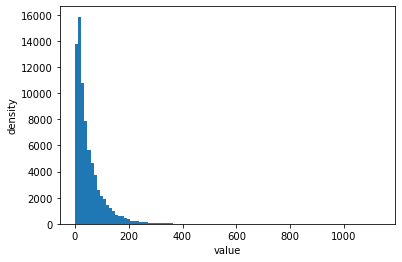

In [17]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.hist(datos["CANTIDAD_ESTUDIANTES"], 100)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
#ax1.hist(datos["CANTIDAD_ESTUDIANTES"])

In [29]:
def calculo_tamano_colegio(variable):
    if(variable<10):
        return 1
    elif(variable<50):
        return 2
    elif(variable<100):
        return 3
    elif(variable<150):
        return 4
    elif(variable<150):
        return 5
    else:
        return 5

In [30]:
datos['Calif_cant_estu']=datos['CANTIDAD_ESTUDIANTES'].apply(lambda cantidad: calculo_tamano_colegio(cantidad) )

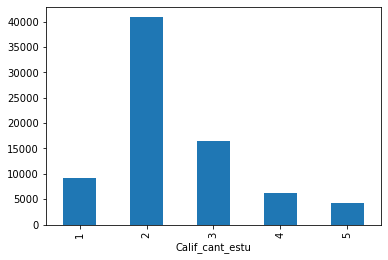

In [31]:
datos.groupby('Calif_cant_estu')['COLE_COD_DANE_SEDE'].count().plot(kind='bar')

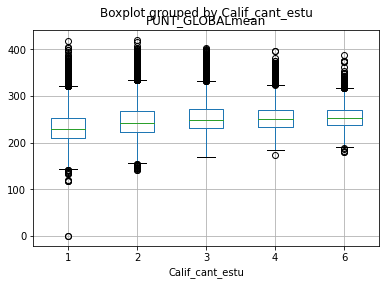

In [27]:
boxplot = datos.boxplot(column=['PUNT_GLOBALmean'] , by='Calif_cant_estu')

In [28]:
datos_sort=datos.sort_values(by='CANTIDAD_ESTUDIANTES', ascending=True)
datos_sort.head(2500)

,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,PERIODO,PUNT_GLOBALmean,PUNT_GLOBALmedian,PUNT_GLOBALstd,PUNT_GLOBALmin,PUNT_GLOBALmax,CANTIDAD_ESTUDIANTES,ANO,SEMESTRE,Calif_cant_estu
18174,286568005610,I.E. RUR CAUCACIA - SEDE PRINCIPAL,86568,PUERTO ASÍS,86,PUTUMAYO,20192,269.00,269.0,NaN,269,269,1,2019,2,1
28656,276111002181,SANTA RITA,76111,GUADALAJARA DE BUGA,76,VALLE,20182,155.00,155.0,NaN,155,155,1,2018,2,1
28655,276111000935,LA MESA,76111,GUADALAJARA DE BUGA,76,VALLE,20182,237.00,237.0,NaN,237,237,1,2018,2,1
5426,225372000611,INSTITUCION EDUCATIVA SUEVA,25372,JUNÍN,25,CUNDINAMARCA,20202,190.00,190.0,NaN,190,190,1,2020,2,1
48194,227361002193,CENT EDUC AGROP EL CACIQUE NOANAMA,27450,MEDIO SAN JUAN,27,CHOCO,20162,171.00,171.0,NaN,171,171,1,2016,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15391,215047000102,ESC SISVACA,15047,AQUITANIA,15,BOYACA,20192,201.75,193.5,46.313245,157,263,4,2019,2,1
6940,276109001100,FRANCISCO CISNEROS,76109,BUENAVENTURA,76,VALLE,20202,165.00,165.0,4.966555,159,171,4,2020,2,1
42700,376130001173,INST SER INTERNACIONAL,76130,CANDELARIA,76,VALLE,20172,214.50,222.5,37.331845,165,248,4,2017,2,1
8883,315759002564,INSTITUTO SAN MARTIN,15759,SOGAMOSO,15,BOYACA,20202,246.00,251.0,55.946403,175,307,4,2020,2,1
